# XGBoost - Census Income (Classification)
[ch1-gradient-boosting.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch1-gradient-boosting.ipynb)

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [4]:
df_census = pd.read_csv('census_income_cleaned.csv')

df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df_census['income_ >50K'].value_counts()

0    24719
1     7841
Name: income_ >50K, dtype: int64

In [6]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32560 non-null  int64
 1   fnlwgt                                      32560 non-null  int64
 2   education-num                               32560 non-null  int64
 3   capital-gain                                32560 non-null  int64
 4   capital-loss                                32560 non-null  int64
 5   hours-per-week                              32560 non-null  int64
 6   workclass_ ?                                32560 non-null  int64
 7   workclass_ Federal-gov                      32560 non-null  int64
 8   workclass_ Local-gov                        32560 non-null  int64
 9   workclass_ Never-worked                     32560 non-null  int64
 10  workclass_ Private                

In [7]:
df_census.isna().sum().sum()

0

### Define Feature and Target

In [8]:
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

### XGBoost - Classification

In [9]:
from xgboost import XGBClassifier

### cross_val_score

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np

def cross_val(classifier, num_splits=10):
    model = classifier

    scores = cross_val_score(model, X, y, cv=num_splits)

    print('Accuracy:', np.round(scores, 2))

    print('Avg. Accuracy: %0.2f' % (scores.mean()))
    
    accuracy = scores.mean()

In [11]:
cross_val(XGBClassifier(n_estimators=5))

[12:16:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Evaluation
### Split train/test dataset

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### XGBoost Classification

In [13]:
model = XGBClassifier(n_estimators=5)

In [14]:
model.fit(X_train, y_train)

[12:16:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8633906633906634

In [16]:
model.score(X_test, y_test)

0.8633906633906634

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6257
           1       0.78      0.58      0.66      1883

    accuracy                           0.86      8140
   macro avg       0.83      0.76      0.79      8140
weighted avg       0.86      0.86      0.86      8140



### Feature Importance

In [18]:
print(model.feature_importances_)

[9.0134339e-03 1.3453410e-03 6.7376770e-02 5.4290872e-02 1.1876832e-02
 7.5855539e-03 4.4879736e-04 0.0000000e+00 3.9639482e-03 0.0000000e+00
 4.0236668e-04 2.4810312e-03 1.3665227e-02 0.0000000e+00 0.0000000e+00
 0.0000000e+00 3.3834551e-03 7.2531903e-01 0.0000000e+00 2.7488202e-03
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 2.0096870e-02 1.5547751e-04 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 3.0655112e-02 0.0000000e+00 0.0000000e+00
 2.9186184e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 7.8126583e-03 0.0000000e+00 1.4254189e-03
 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.5763495e-03 0.0000000e+00
 1.9055798e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

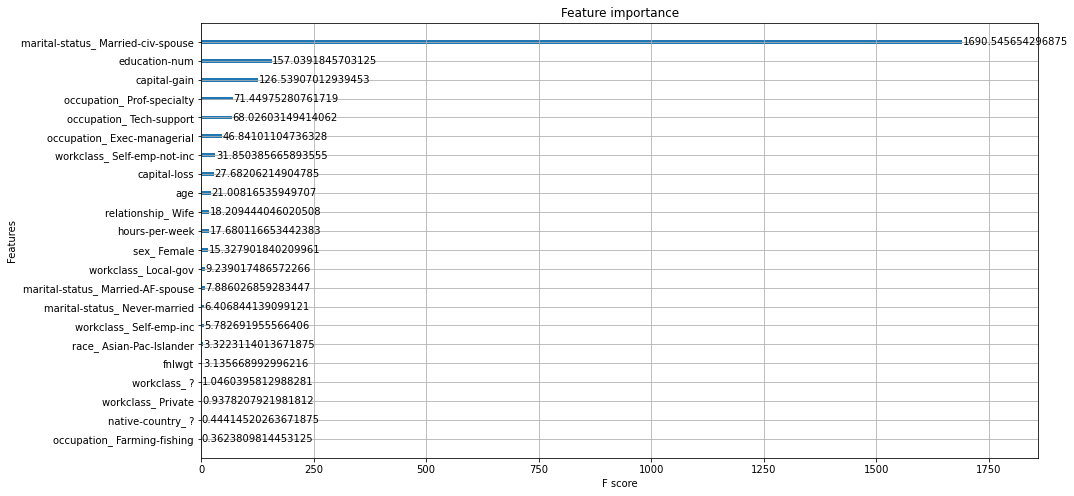

In [19]:
import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
model.get_booster().feature_names = feature_data.feature_names
model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(model, ax=ax, importance_type='gain')

In [20]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


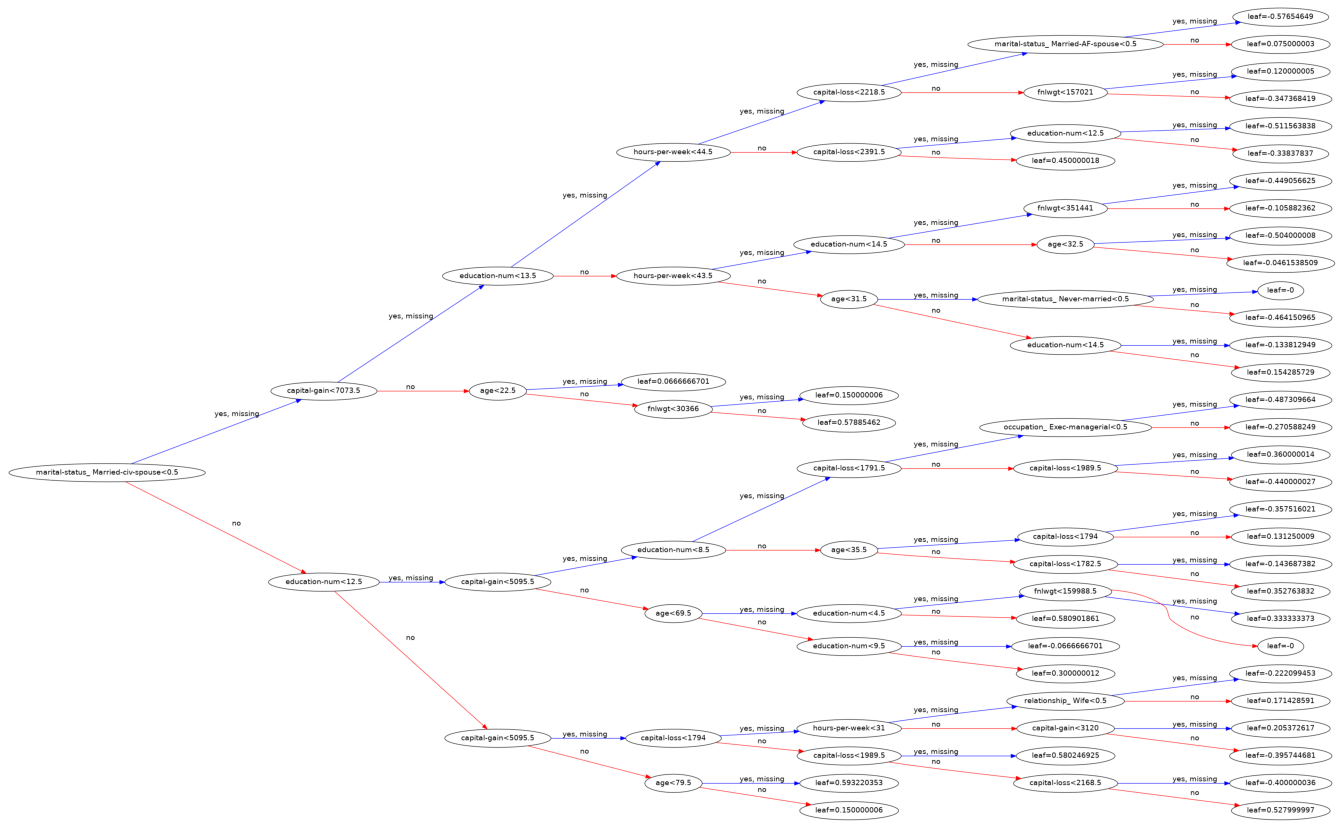

In [21]:
xgb.plot_tree(model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(50, 15)
plt.show()

## classification_model

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

def classification_model(model):
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    
    print('Accuracy:', np.round(scores, 2))
    print('Avg. Accuracy: %0.2f' % (scores.mean()))

In [23]:
classification_model(XGBClassifier(booster='gbtree'))  # default

[12:16:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [24]:
classification_model(XGBClassifier(booster='gblinear'))

[12:16:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [25]:
classification_model(XGBClassifier(booster='dart', one_drop=1))

[12:16:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [26]:
from sklearn.ensemble import RandomForestClassifier

classification_model(RandomForestClassifier())

Accuracy: [0.85 0.85 0.86 0.86 0.86]
Avg. Accuracy: 0.86


## HPO

### Default

In [27]:
start = time.time()

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
    
y_pred = xgb.predict(X_test)
    
default_score = accuracy_score(y_pred, y_test)

print('default score: %0.2f' % (default_score))
print('Elased time: %0.2fs' % (time.time()-start))    

params = xgb.get_params()

[12:17:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
default score: 0.87
Elased time: 1.43s


## HPO: Randomized Search

In [28]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='accuracy')
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    best_params = rand_clf.best_params_
    print("best parameter:", best_params)
    
    best_score = rand_clf.best_score_
    print("best recall score: {:.3f}".format(best_score))
    
    return best_model

In [29]:
import time
start = time.time()

best_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
        'min_child_weight':[1, 2, 3, 4, 5],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

best parameter: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.4, 'gamma': 1, 'colsample_bytree': 0.7}
best recall score: 0.871

Elased time: 2614.91s


In [30]:
best_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'enable_categorical': False,
 'gamma': 1,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.4,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 3,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 200,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

## Evaluation

### cross_val_score

In [31]:
classification_model(best_model)

Accuracy: [0.87 0.87 0.87 0.88 0.87]
Avg. Accuracy: 0.87


### Prediction

In [32]:
y_pred = best_model.predict(X_test)

### classification_report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6257
           1       0.77      0.65      0.70      1883

    accuracy                           0.87      8140
   macro avg       0.83      0.79      0.81      8140
weighted avg       0.87      0.87      0.87      8140



In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Accuracy Score: %0.2f' % (accuracy_score(y_test,y_pred)))
print('Precision Score: %0.2f' % (precision_score(y_test,y_pred)))
print('Recall Score: %0.2f' % (recall_score(y_test,y_pred)))
print('F1 Score: %0.2f' % (f1_score(y_test,y_pred)))

Accuracy Score: 0.87
Precision Score: 0.77
Recall Score: 0.65
F1 Score: 0.70
